<a href="https://colab.research.google.com/github/graci-py/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem Tasmânia" width="500%" src="https://brasil123.com.br/wp-content/uploads/2021/09/destinations-copenhagen-banner-mobile-1024x553-1.jpg">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Copenhagen*

**Copenhagen**  é eleita a cidade mais segura do mundo em 2021, Em parte, o atual cenário vivido pode ajudar a explicar o levantamento feito pelo Índice de Cidades Seguras (SCI), realizado pela Economist Intelligence Unit. Este apanhado listou os 60 destinos internacionais mais seguros de todo o mundo. 

Esta lista considera fatores como a segurança em saúde, infraestrutura, digital, pessoal e ambiental, a mais nova a fazer parte deste estudo. Por anos, famosas cidades asiáticas como Tóquio, Cingapura e Osaka ganharam disparadamente nos primeiros lugares. No entanto, em 2021 o posto foi tomado por uma cidade europeia, Copenhagen.

A capital dinamarquesa ganhou a disputa facilmente após atingir a marca de 82,4 pontos em 100  no relatório anual. Em 2019 Copenhagen ocupava o oitavo lugar do ranking, e em questão de dois anos saltou para o topo da lista. Acredita-se que um fator primordial que tenha contribuído nesta conquista se refere à introdução de uma seção de segurança ambiental, a qual recebeu uma avaliação positiva junto à segurança pessoal. 

Já [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Copenhagen, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2021-09-30/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id`:número de id gerado para identificar o imóvel
* `name`: nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião)
* `host_name`: nome do proprietário
* `neighbourhood_group`: esta coluna não contém nenhum valor válido
* `neighbourhood`: nome do bairro
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da propriedade
* `room_type`: informa o tipo de quarto ofertado
* `price`: preço para alugar o imóvel
* `minimum_nights`: quantidade mínima de noites para reserva
* `number_of_reviews`: número de reviews que a propriedade possui
* `last_review`: data do último review
* `reviews_per_month`: quantidade de reviews por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo proprietário
* `availability_365`:  número de dias de disponibilidade dentro de 365 dias
*  `number_of_reviews_ltm`:O número de avaliações (nos últimos 12 meses)
* `license`: A licença / número de registro


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68641,12.54741,Private room,370,2,168,2018-11-23,1.58,1,0,0,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69196,12.57637,Entire home/apt,2400,4,51,2019-12-14,0.74,1,340,1,NaN
2,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67023,12.55504,Entire home/apt,725,7,22,2019-07-22,0.35,1,101,0,NaN
3,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.66539,12.55639,Entire home/apt,750,2,17,2012-06-10,0.26,1,0,0,NaN
4,32379,120 m2 artist flat on Vesterbro,140105,Lise,NaN,Vesterbro-Kongens Enghave,55.67297,12.55327,Entire home/apt,1153,3,75,2019-08-17,0.66,1,12,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 9625
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() /df.shape[0]).sort_values(ascending = False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.143584
last_review                       0.143584
host_name                         0.000312
name                              0.000104
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [6]:
#excluir as colunas "license" e "neighbourhood_group", pois estão com todos os seu valores ausentes
df = df.drop(columns=['license','neighbourhood_group' ])

### **Q3. Qual o tipo de distribuição das variáveis?** 

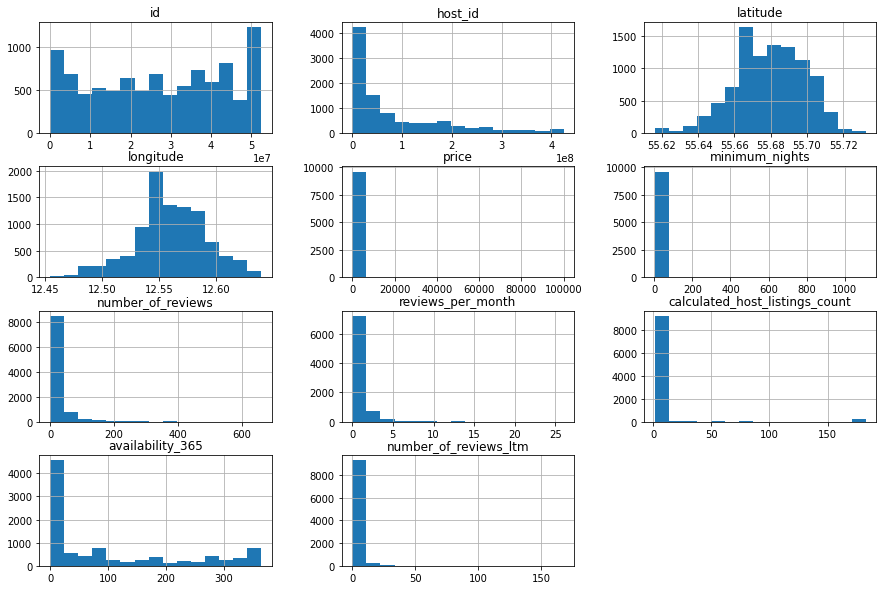

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``
df.price.mean()

1085.198961038961

In [9]:
# ver o resumo estatístico das variáveis numéricas
df.price.describe()

count      9625.000000
mean       1085.198961
std        2133.844053
min           0.000000
25%         609.000000
50%         850.000000
75%        1200.000000
max      100000.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [10]:
# criar uma matriz de correlação
corr = df.corr()
display(corr)
# mostrar a matriz de correlação


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.467586,-0.037221,0.007822,-0.026758,-0.030695,-0.396377,0.215927,0.058128,-0.077431,0.099612
host_id,0.467586,1.000000,-0.030301,0.014288,0.010761,-0.031301,-0.164844,0.147511,0.172973,0.045517,0.116252
latitude,-0.037221,-0.030301,1.000000,-0.234720,-0.018852,0.000718,-0.013701,-0.028362,-0.040464,-0.005112,-0.012601
longitude,0.007822,0.014288,-0.234720,1.000000,0.046838,-0.017280,0.048664,0.054772,0.062446,0.048904,0.048754
price,-0.026758,0.010761,-0.018852,0.046838,1.000000,0.006294,-0.002487,-0.018138,0.021897,0.079588,-0.034929
minimum_nights,-0.030695,-0.031301,0.000718,-0.017280,0.006294,1.000000,-0.018317,-0.032997,-0.029530,0.023714,-0.036764
number_of_reviews,-0.396377,-0.164844,-0.013701,0.048664,-0.002487,-0.018317,1.000000,0.363929,-0.082559,0.098172,0.372424
reviews_per_month,0.215927,0.147511,-0.028362,0.054772,-0.018138,-0.032997,0.363929,1.000000,-0.025942,0.085583,0.541964
calculated_host_listings_count,0.058128,0.172973,-0.040464,0.062446,0.021897,-0.029530,-0.082559,-0.025942,1.000000,-0.046165,-0.040848
availability_365,-0.077431,0.045517,-0.005112,0.048904,0.079588,0.023714,0.098172,0.085583,-0.046165,1.000000,0.071726


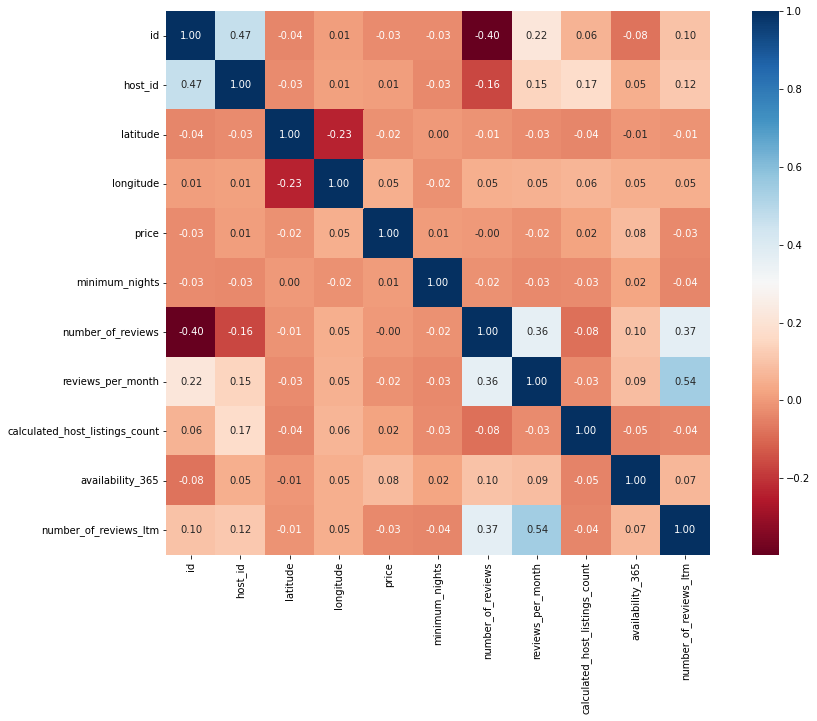

In [23]:
# plotar um heatmap a partir das correlações
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    8181
Private room       1399
Hotel room           26
Shared room          19
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.849974
Private room       0.145351
Hotel room         0.002701
Shared room        0.001974
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [29]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Indre By                     1488.377167
Frederiksberg                1143.603980
Amager Vest                  1101.554951
sterbro                      1071.058532
Vesterbro-Kongens Enghave    1050.333333
Amager st                    1000.765363
Valby                         921.622596
Nrrebro                       885.829122
Vanlse                        841.432900
Brnshj-Husum                  815.974359
Name: price, dtype: float64

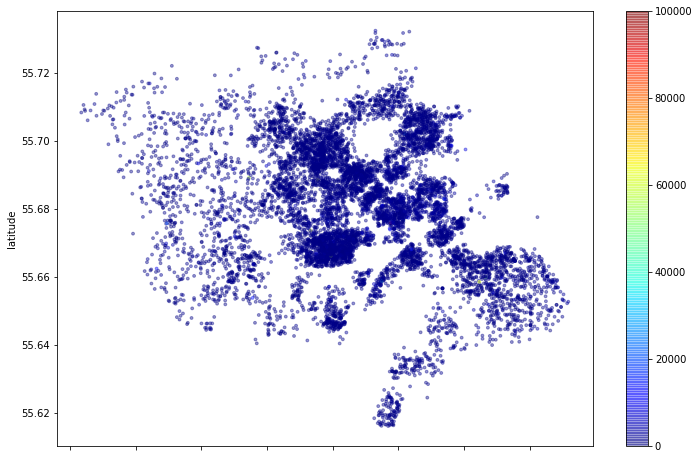

In [32]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [33]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

4.594181818181818

## Conclusões


Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

As áreas mais cara para se alugar um quarto são: Indre By, Frederiksberg, Amager Vest.

O tipo de quarto mais alugado é o Entire home/apt.

E as pessoas em média alugam os quartos por 5 noites.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.